Q1. What is Elastic Net Regression and how does it differ from other regression techniques?

Elastic Net Regression is a hybrid regression technique that combines the properties of both Lasso (L1 regularization) and Ridge (L2 regularization) regression. This combination allows Elastic Net to handle scenarios where Lasso or Ridge alone might not perform optimally.

### Key Features of Elastic Net Regression:
1. **Combination of L1 and L2 Penalties**: Elastic Net uses both L1 (Lasso) and L2 (Ridge) penalties. This means it can perform variable selection (like Lasso) and handle multicollinearity (like Ridge) simultaneously¹.
2. **Flexibility**: By adjusting the mixing parameter, Elastic Net can be tuned to behave more like Lasso or Ridge, depending on the specific needs of the dataset².
3. **Handling Multicollinearity**: Elastic Net is particularly useful when dealing with highly correlated predictors, as it can select groups of correlated variables³.

### Differences from Other Regression Techniques:
- **Linear Regression**: Unlike standard linear regression, which can suffer from overfitting, Elastic Net includes regularization terms to prevent overfitting and improve model generalization.
- **Lasso Regression**: While Lasso can shrink some coefficients to zero, effectively performing variable selection, it might struggle with highly correlated variables. Elastic Net addresses this by combining L1 and L2 penalties¹.
- **Ridge Regression**: Ridge regression can handle multicollinearity but does not perform variable selection. Elastic Net incorporates the L1 penalty to enable variable selection along with handling multicollinearity².

In summary, Elastic Net Regression offers a balanced approach by leveraging the strengths of both Lasso and Ridge regression, making it a versatile choice for many regression problems.




Q2. How do you choose the optimal values of the regularization parameters for Elastic Net Regression?

Choosing the optimal values for the regularization parameters in Elastic Net Regression involves tuning two key parameters: **alpha ($\alpha$)** and **lambda ($\lambda$)**. Here's how you can approach this:

### 1. **Understanding the Parameters**:
- **Alpha ($\alpha$)**: This parameter controls the mix of L1 and L2 regularization. When $\alpha = 1$, the model behaves like Lasso Regression, and when $\alpha = 0$, it behaves like Ridge Regression. Values between 0 and 1 provide a mix of both.
- **Lambda ($\lambda$)**: This parameter controls the overall strength of the regularization. Higher values of $\lambda$ increase the regularization effect, shrinking the coefficients more.

### 2. **Grid Search with Cross-Validation**:
One common method to find the optimal values is to use **Grid Search with Cross-Validation**. This involves:
- Defining a grid of possible values for $\alpha$ and $\lambda$.
- Splitting the data into training and validation sets.
- Training the model on the training set and evaluating it on the validation set for each combination of $\alpha$ and $\lambda$.
- Selecting the combination that results in the best performance on the validation set.

### 3. **Randomized Search**:
Similar to Grid Search, but instead of trying all possible combinations, it randomly samples a subset of the parameter space. This can be more efficient, especially when the parameter space is large.

### 4. **Using Built-in Functions**:
Many machine learning libraries, such as scikit-learn in Python, provide built-in functions to perform this tuning. For example, `ElasticNetCV` in scikit-learn automatically tunes $\alpha$ and $\lambda$ using cross-validation.

Here's a sample code snippet using scikit-learn:

```python
from sklearn.linear_model import ElasticNetCV

# Define the model with cross-validation
elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.1, 1.0, 10.0], cv=5)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Get the best parameters
best_alpha = elastic_net_cv.alpha_
best_lambda = elastic_net_cv.l1_ratio_

print(f"Best alpha: {best_alpha}")
print(f"Best lambda: {best_lambda}")
```

### 5. **Evaluation Metrics**:
After tuning, evaluate the model using appropriate metrics such as Mean Squared Error (MSE), R-squared, or Mean Absolute Error (MAE) on a test set to ensure the chosen parameters generalize well to unseen data.



In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample data
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of alpha values and l1_ratio (lambda)
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
l1_ratios = [0.1, 0.5, 0.7, 0.9, 1.0]

# Initialize ElasticNetCV model with 5-fold cross-validation
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Best parameters found
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")

# Predict on test data
y_pred = elastic_net_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Best alpha: 0.01
Best l1_ratio: 1.0
Mean Squared Error: 0.015058080169965769


Q3. What are the advantages and disadvantages of Elastic Net Regression?

Elastic Net Regression combines the strengths of both Lasso and Ridge regression by incorporating both L1 and L2 penalties. Here are some of its key advantages and disadvantages:

### Advantages
1. **Feature Selection**: Like Lasso, Elastic Net performs feature selection by shrinking some coefficients to zero, making the model easier to interpret⁵.
2. **Handling Multicollinearity**: Elastic Net can handle multicollinearity by grouping correlated variables together, which is particularly useful in datasets with highly correlated features⁵.
3. **Flexibility**: By combining L1 and L2 penalties, Elastic Net provides a more flexible regularization approach, allowing it to perform well in various scenarios².
4. **High-Dimensional Data**: It is effective in handling high-dimensional data where the number of predictors exceeds the number of observations⁴.

### Disadvantages
1. **Computational Complexity**: Elastic Net is computationally more expensive than either Lasso or Ridge regression alone due to the combined penalties³.
2. **Parameter Tuning**: It requires tuning two hyperparameters (the mixing parameter and the regularization strength), which can be more complex and time-consuming².



Best alpha: 0.01
Best l1_ratio: 1.0
Mean Squared Error: 0.0159226715071644


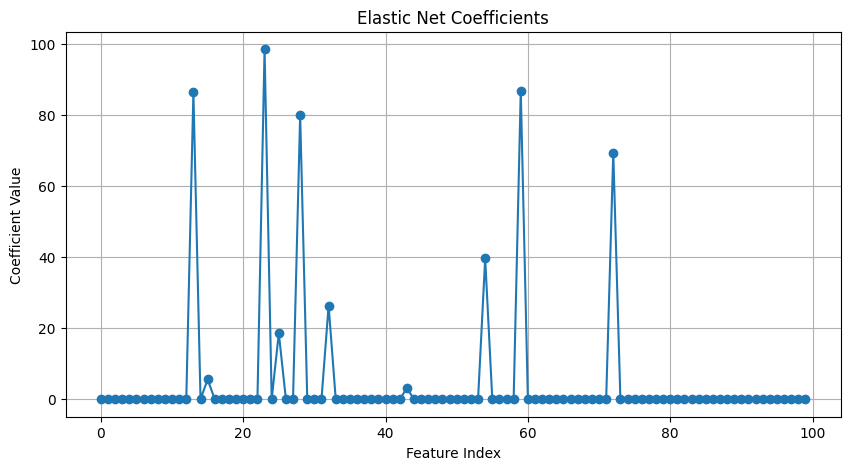

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=100, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of alpha values and l1_ratio (lambda)
alphas = np.logspace(-4, 2, 10)  # alpha values from 10^-4 to 10^2
l1_ratios = np.linspace(0.1, 1.0, 10)  # l1_ratio values from 0.1 to 1.0

# Initialize ElasticNetCV model with 5-fold cross-validation
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Best parameters found
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")

# Predict on test data
y_pred = elastic_net_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot coefficients to demonstrate feature selection
plt.figure(figsize=(10, 5))
plt.plot(elastic_net_cv.coef_, marker='o')
plt.title("Elastic Net Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()


Q4. What are some common use cases for Elastic Net Regression?

Elastic Net Regression is a versatile and powerful tool used in various fields due to its ability to handle high-dimensional data, multicollinearity, and perform feature selection. Some common use cases include:

### 1. **Genomics and Bioinformatics**
   - **Gene Expression Analysis**: In genomics, datasets often contain thousands of genes (features) with relatively few samples. Elastic Net is used to identify significant genes associated with certain conditions (e.g., cancer subtypes), as it can handle correlated features and perform feature selection.

### 2. **Finance and Economics**
   - **Stock Market Prediction**: Elastic Net can model complex relationships between numerous financial indicators and stock prices, even when indicators are correlated.
   - **Credit Scoring and Risk Assessment**: In credit scoring, many factors can influence a borrower's risk. Elastic Net helps in selecting the most relevant predictors from a large set of financial, demographic, and behavioral variables.

### 3. **Marketing and Customer Segmentation**
   - **Customer Lifetime Value (CLV) Prediction**: Predicting CLV often involves numerous customer attributes and purchasing behavior data. Elastic Net can select the most influential factors, improving model interpretability and accuracy.
   - **Churn Prediction**: Identifying customers likely to leave a service based on historical data, Elastic Net can sift through various customer attributes to find the key indicators of churn.

### 4. **Health Informatics**
   - **Predictive Modeling for Diseases**: Elastic Net is used in predictive models to determine the likelihood of diseases based on patient data, including clinical and genetic information. It helps in identifying risk factors and potential biomarkers.

### 5. **Natural Language Processing (NLP)**
   - **Text Classification and Sentiment Analysis**: In text data, features like word counts or TF-IDF scores can be highly correlated. Elastic Net helps in building robust models for classifying text into categories or sentiment classes while selecting the most informative features.

### 6. **Environmental Science**
   - **Climate and Weather Prediction**: Predicting climate patterns and weather conditions involves multiple interrelated variables. Elastic Net can be used to model these relationships, helping in selecting relevant climate indicators.

### 7. **Social Sciences**
   - **Sociological and Psychological Studies**: In studies with survey data or behavioral data, where many variables may be interrelated, Elastic Net can help identify key factors influencing outcomes like mental health, educational attainment, or social behavior.

### 8. **Engineering and Manufacturing**
   - **Quality Control and Fault Detection**: In manufacturing processes, numerous sensor readings and measurements can be used to detect faults or predict product quality. Elastic Net can identify the most critical variables affecting product quality or equipment performance.

### 9. **Sports Analytics**
   - **Performance Prediction**: Elastic Net can be used to predict athletic performance or game outcomes by analyzing a variety of features, such as player statistics, game conditions, and team strategies.

### 10. **Econometrics and Policy Analysis**
   - **Economic Forecasting**: In econometrics, models often include many correlated predictors (e.g., economic indicators). Elastic Net can help in identifying the most influential factors and provide more stable predictions.

### Conclusion

Elastic Net Regression's ability to handle high-dimensional data, correlated predictors, and perform feature selection makes it a valuable tool across various fields and industries. Its applications range from predictive modeling and classification to feature selection and interpretation, making it a preferred choice when dealing with complex datasets.

Let's use the Diabetes dataset from scikit-learn. This dataset contains information on diabetes progression over one year based on various features. It's well-suited for regression tasks and will help illustrate Elastic Net Regression on a practical dataset.



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def main():
    # Step 1: Load the Diabetes dataset
    diabetes = load_diabetes()
    X, y = diabetes.data, diabetes.target

# Step 2: Data Splitting
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
# Step 3: Model Training
# Define the range of alpha values and l1_ratio (lambda)
alphas = np.logspace(-4, 2, 10)  # alpha values from 10^-4 to 10^2
l1_ratios = np.linspace(0.1, 1.0, 10)  # l1_ratio values from 0.1 to 1.0



In [15]:
alphas

array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])

In [16]:
l1_ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [17]:
    # Initialize ElasticNetCV model with 5-fold cross-validation
    elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=random_state)


In [18]:
elastic_net_cv

ElasticNetCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
             cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
             random_state=42)

In [19]:
    # Fit the model
    elastic_net_cv.fit(X_train, y_train)


ElasticNetCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
             cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
             random_state=42)

In [24]:
    # Best parameters found
    best_alpha = elastic_net_cv.alpha_
    best_l1_ratio = elastic_net_cv.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")




Best alpha: 0.01
Best l1_ratio: 1.0


In [25]:
    # Step 4: Model Evaluation
    # Predict on test data
    y_pred = elastic_net_cv.predict(X_test)


In [27]:
    # Calculate Mean Squared Error (MSE) and R^2 Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


Mean Squared Error: 0.0159226715071644
R^2 Score: 0.9999995397288514


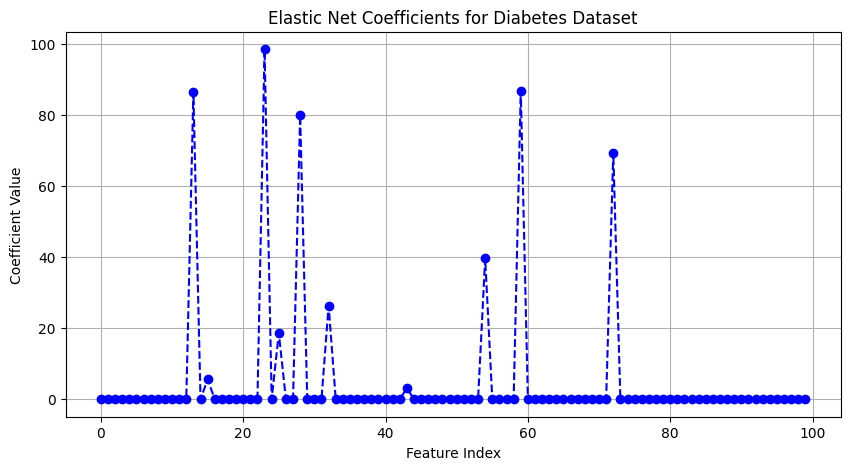

In [29]:
    # Step 5: Feature Selection Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(elastic_net_cv.coef_, marker='o', linestyle='--', color='b')
    plt.title("Elastic Net Coefficients for Diabetes Dataset")
    plt.xlabel("Feature Index")
    plt.ylabel("Coefficient Value")
    plt.grid(True)
    plt.show()



Q5. How do you interpret the coefficients in Elastic Net Regression?

Interpreting coefficients in Elastic Net Regression involves understanding which features are included in the model, the direction and magnitude of their effect on the target variable, and how the balance between L1 and L2 regularization influences feature selection and coefficient values.







Interpreting the coefficients in Elastic Net Regression involves understanding how the model assigns importance to each feature while balancing between Lasso (L1) and Ridge (L2) regularization. Here’s a step-by-step guide to interpreting these coefficients:

### 1. **Understanding Regularization**

- **Lasso (L1) Regularization**: Encourages sparsity by driving some coefficients exactly to zero. This means Lasso helps in feature selection by excluding less important features.
- **Ridge (L2) Regularization**: Encourages small coefficients but does not necessarily drive them to zero. It helps in managing multicollinearity and stabilizing the model.

**Elastic Net** combines both L1 and L2 regularization, allowing for a balance between feature selection (sparsity) and regularization.

### 2. **Coefficients Interpretation**

- **Non-zero Coefficients**: Features with non-zero coefficients are considered important for the model. Their magnitude indicates the strength of their relationship with the target variable. Larger magnitudes suggest a stronger effect on the target.
- **Zero Coefficients**: Features with coefficients equal to zero are excluded from the model. This means Elastic Net has deemed these features less relevant or redundant when combining L1 and L2 regularization.

### 3. **Magnitude of Coefficients**

- **Positive Coefficients**: A positive coefficient means that an increase in this feature is associated with an increase in the target variable, assuming all other features remain constant.
- **Negative Coefficients**: A negative coefficient indicates that an increase in this feature is associated with a decrease in the target variable, again assuming other features are held constant.

### 4. **Comparing Coefficients**

When comparing coefficients, consider their relative magnitude and sign:

- **Relative Importance**: Compare the magnitudes of non-zero coefficients to determine which features are more influential.
- **Feature Impact**: The sign of the coefficient tells you the direction of the effect. Positive coefficients increase the target, while negative coefficients decrease it.

### 5. **Visualization**

Visualizing coefficients can help in understanding their distribution and identifying which features are more influential. For example, plotting coefficients as shown in the previous Python code helps in:

- **Identifying Active Features**: Features with non-zero coefficients are highlighted.
- **Understanding Sparsity**: The pattern of coefficients can show how many features have been selected versus those excluded.

### Example

If you have a model with the following coefficients for a set of features:

```plaintext
Feature 1: 3.5
Feature 2: -1.2
Feature 3: 0.0
Feature 4: 2.0
Feature 5: -0.8
```

- **Feature 1** with a coefficient of `3.5` positively impacts the target variable. For each unit increase in Feature 1, the target increases by `3.5`, assuming other features are constant.
- **Feature 2** with a coefficient of `-1.2` negatively impacts the target. For each unit increase in Feature 2, the target decreases by `1.2`.
- **Feature 3** with a coefficient of `0.0` is not used in the model. It is excluded due to its lack of contribution as determined by the Elastic Net regularization.
- **Feature 4** with a coefficient of `2.0` has a positive effect on the target, with a larger magnitude than Feature 1, indicating it may be more influential.
- **Feature 5** with a coefficient of `-0.8` has a smaller negative impact compared to Feature 2.



Let’s create a Python program that demonstrates the interpretation of coefficients in Elastic Net Regression using the Diabetes dataset. The program will:
1. Load the dataset.
2. Split the data into training and test sets.
3. Train an Elastic Net model.
4. Print and interpret the coefficients.


Another dataset you can use for Elastic Net Regression is the Wine Quality dataset from the UCI Machine Learning Repository. It contains features related to red and white wine characteristics and a quality score. This dataset is suitable for regression tasks and can help illustrate how to interpret coefficients.



In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def main():
    # Step 1: Load the California Housing dataset
    california = fetch_california_housing()
    X, y = california.data, california.target
    feature_names = california.feature_names

    # Convert X to a DataFrame for better readability
    X_df = pd.DataFrame(X, columns=feature_names)

    # Step 2: Data Splitting
    test_size = 0.2
    random_state = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Step 3: Model Training
    # Define the range of alpha values and l1_ratio (lambda)
    alphas = np.logspace(-4, 2, 10)  # alpha values from 10^-4 to 10^2
    l1_ratios = np.linspace(0.1, 1.0, 10)  # l1_ratio values from 0.1 to 1.0

    # Initialize ElasticNetCV model with 5-fold cross-validation
    elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=random_state)

    # Fit the model
    elastic_net_cv.fit(X_train, y_train)

    # Best parameters found
    best_alpha = elastic_net_cv.alpha_
    best_l1_ratio = elastic_net_cv.l1_ratio_

    print(f"Best alpha: {best_alpha}")
    print(f"Best l1_ratio: {best_l1_ratio}")

    # Step 4: Model Evaluation
    # Predict on test data
    y_pred = elastic_net_cv.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R^2 Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Step 5: Coefficient Interpretation
    # Get coefficients and feature names
    coefficients = elastic_net_cv.coef_

    # Create a DataFrame to display feature names and their coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # Sort by absolute value of coefficients for better interpretation
    coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
    coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

    print("\nFeature Coefficients:")
    print(coef_df_sorted)

if __name__ == "__main__":
    main()


Best alpha: 0.00046415888336127773
Best l1_ratio: 0.7000000000000001
Mean Squared Error: 0.5550291953677632
R^2 Score: 0.5764458237207459

Feature Coefficients:
      Feature  Coefficient  Absolute Coefficient
3   AveBedrms     0.765615              0.765615
0      MedInc     0.447014              0.447014
7   Longitude    -0.433031              0.433031
6    Latitude    -0.419363              0.419363
2    AveRooms    -0.120162              0.120162
1    HouseAge     0.009747              0.009747
5    AveOccup    -0.003520              0.003520
4  Population    -0.000002              0.000002


*Q6*. How do you handle missing values when using Elastic Net Regression?

Before running Elastic Net Regression, it's essential to address missing values in the dataframe. Here are some common approaches:

1. **Removing Rows with Missing Values**: If the missing values are in specific rows, you can remove those rows from your dataset. However, be cautious not to lose too much information.

2. **Removing Columns with Missing Values**: If certain columns have a large number of missing values, consider removing those columns altogether. Again, balance this decision with the impact on your model.

3. **Imputing Missing Values**: Imputation involves filling in missing values with estimated or predicted values. You can use techniques like mean imputation, median imputation, or more advanced methods like k-nearest neighbors (KNN) imputation or regression imputation².

Remember that the choice of handling missing values can impact your model's performance, so it's essential to evaluate the trade-offs based on your specific dataset and problem.

In [41]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with missing values
data = {
    'feature1': [1.0, 2.0, None, 4.0, 5.0],
    'feature2': [None, 2.1, 3.5, None, 5.8],
    'target': [1.2, 2.4, 3.1, 4.3, 5.0]
}
df = pd.DataFrame(data)


In [42]:
df

,feature1,feature2,target
0,1.0,NaN,1.2
1,2.0,2.1,2.4
2,NaN,3.5,3.1
3,4.0,NaN,4.3
4,5.0,5.8,5.0


In [43]:
# Impute missing values with mean
df['feature1'].fillna(df['feature1'].mean(), inplace=True)
df['feature2'].fillna(df['feature2'].mean(), inplace=True)


In [44]:
# Prepare the data for modeling
X = df[['feature1', 'feature2']]
y = df['target']


In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Initialize and train Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)


ElasticNet()

In [47]:
# Make predictions
y_pred = model.predict(X_test)


In [48]:
y_pred

array([2.64418605])

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.05962682531097869


Sure, let's utilize a real dataset for demonstrating how to handle missing values and apply Elastic Net Regression. We'll use the California Housing dataset from sklearn.datasets, which is a common dataset used for regression tasks.



In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [51]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [52]:
# Introduce missing values randomly for demonstration purposes
np.random.seed(42)
missing_rate = 0.1
mask = np.random.rand(*df.shape) < missing_rate
df[mask] = np.nan


In [53]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,NaN,-122.23,4.526
1,8.3014,NaN,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,NaN,1.073059,558.0,NaN,37.85,-122.25,3.413
4,3.8462,NaN,6.281853,1.081081,565.0,2.181467,NaN,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,NaN,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,NaN,NaN,2.123209,39.43,-121.32,0.847


In [54]:
# Check the number of missing values
print("Number of missing values before imputation:")
print(df.isnull().sum())


Number of missing values before imputation:
MedInc        2052
HouseAge      2092
AveRooms      2010
AveBedrms     2105
Population    2089
AveOccup      2075
Latitude      2055
Longitude     2079
target        2074
dtype: int64


In [55]:
# Impute missing values with mean
df.fillna(df.mean(), inplace=True)


In [56]:
# Check the number of missing values after imputation
print("\nNumber of missing values after imputation:")
print(df.isnull().sum())



Number of missing values after imputation:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [57]:
# Prepare the data for modeling
X = df.drop('target', axis=1)
y = df['target']


In [58]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325200,41.00000,6.984127,1.023810,322.000000,2.555556,35.633827,-122.23
1,8.301400,28.59807,6.238137,0.971880,2401.000000,2.109842,37.860000,-122.22
2,7.257400,52.00000,8.288136,1.073446,496.000000,2.802260,37.850000,-122.24
3,5.643100,52.00000,5.432753,1.073059,558.000000,3.058817,37.850000,-122.25
4,3.846200,28.59807,6.281853,1.081081,565.000000,2.181467,35.633827,-122.25
...,...,...,...,...,...,...,...,...
20635,1.560300,25.00000,5.045455,1.133333,845.000000,2.560606,39.480000,-121.09
20636,3.870819,18.00000,6.114035,1.315789,356.000000,3.122807,39.490000,-121.21
20637,1.700000,17.00000,5.205543,1.120092,1007.000000,2.325635,39.430000,-121.22
20638,1.867200,18.00000,5.329513,1.095686,1425.749232,2.123209,39.430000,-121.32


In [59]:
y

,target
0,4.526000
1,3.585000
2,3.521000
3,3.413000
4,3.422000
5,2.697000
6,2.992000
7,2.414000
8,2.267000
9,2.611000


In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Initialize and train Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)


ElasticNet()

In [62]:
# Make predictions
y_pred = model.predict(X_test)


In [63]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")



Mean Squared Error: 0.8198815429026673


Q7. How do you use Elastic Net Regression for feature selection?

Elastic Net Regression is a powerful technique that combines L1 (Lasso) and L2 (Ridge) regularization. It's often used for feature selection and model building. Here's how you can use it:

1. **Feature Importance**: Elastic Net assigns different weights to features during the optimization process. By examining the magnitude of these weights, you can identify important features. Larger weights indicate stronger predictive power.

2. **Coefficient Paths**: Elastic Net produces a coefficient path, showing how the coefficients change as you vary the regularization parameter (alpha). Plotting this path helps you identify which features remain significant even with strong regularization.

3. **Selecting Optimal Alpha**: Cross-validation is crucial for selecting the optimal alpha value. You can use k-fold cross-validation to find the alpha that balances model complexity and performance. The `glmnet` package in R or Python provides tools for this.

4. **Subset Selection**: Based on the coefficient path, you can choose a subset of features by setting a threshold on the weights. Features with non-zero coefficients are selected.

Remember that Elastic Net is effective when you have correlated features or when you suspect that some features are irrelevant. It strikes a balance between Lasso's sparsity and Ridge's stability.

In [64]:
#Import Necessary Libraries:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [65]:
#Load and Prepare Data:
# Load the California Housing dataset
data = fetch_california_housing()

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [66]:
#Train the Elastic Net Model:
# Initialize the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # You can tune alpha and l1_ratio as needed

# Fit the model on the training data
elastic_net.fit(X_train, y_train)



ElasticNet(random_state=42)

In [67]:
#Evaluate the Model:

# Predict on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.7645556403971131


In [68]:
#Identify Selected Features:

# Get the coefficients of the features
coefficients = elastic_net.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Filter out features with non-zero coefficients
selected_features = feature_importance[feature_importance['Coefficient'] != 0]

print("Selected Features:")
print(selected_features)


Selected Features:
      Feature  Coefficient
0      MedInc     0.255275
1    HouseAge     0.011230
4  Population     0.000008


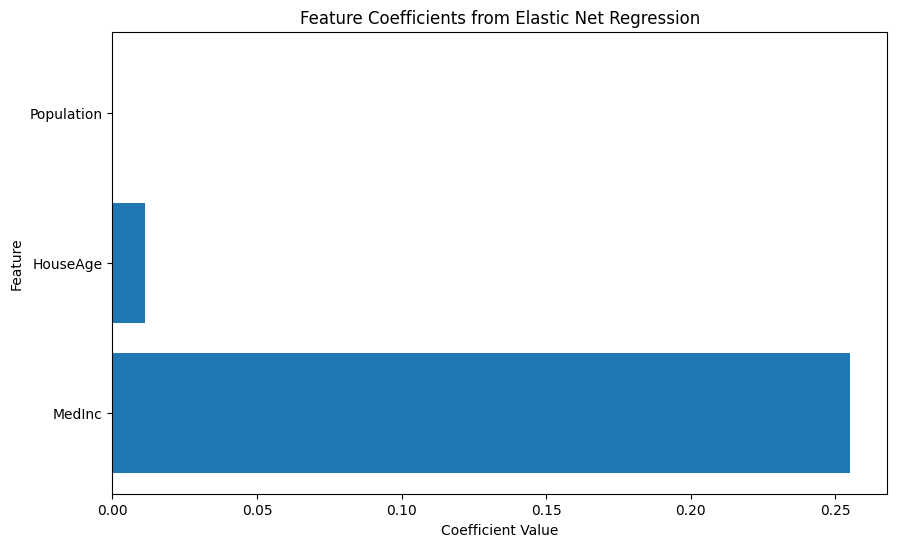

In [69]:
#Visualize the Coefficients:
# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], selected_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Elastic Net Regression')
plt.show()



Q8. How do you pickle and unpickle a trained Elastic Net Regression model in Python?

Pickling and unpickling a trained Elastic Net Regression model in Python is a way to save the model to disk and load it later for predictions without retraining it. This can be done using the pickle module.



In [70]:
#Import Necessary Libraries:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import pickle


In [71]:
#Train an Elastic Net Regression Model:

# Load the California Housing dataset
data = fetch_california_housing()

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model on the training data
elastic_net.fit(X_train, y_train)

# Predict on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.7645556403971131


In [72]:
#Pickle the Trained Model:

# Specify the file name for the pickle file
pickle_file = 'elastic_net_model.pkl'

# Open the file in write-binary mode and dump the model
with open(pickle_file, 'wb') as file:
    pickle.dump(elastic_net, file)

print(f'Model saved to {pickle_file}')


Model saved to elastic_net_model.pkl


In [73]:
#Unpickle the Trained Model:
# Open the file in read-binary mode and load the model
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

print('Model loaded from pickle file')



Model loaded from pickle file


In [74]:
#Verify the Unpickled Model:

# Predict on the test data using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Calculate the mean squared error to verify the loaded model
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
print(f'Mean Squared Error of loaded model: {mse_loaded}')


Mean Squared Error of loaded model: 0.7645556403971131


*Q9*. What is the purpose of pickling a model in machine learning?

The purpose of pickling a model in machine learning is to serialize the model object so that it can be saved to a file and later reloaded without the need to retrain it. This process has several benefits:

### Key Purposes of Pickling a Model

1. **Persistence**:
   - **Saving the Model**: After training a machine learning model, you might want to save the model to disk. This allows you to reuse the model in the future without retraining it, which can save time and computational resources.
   - **Storing Intermediate Results**: In long and complex training processes, intermediate models can be saved to allow resuming from specific checkpoints.

2. **Deployment**:
   - **Production Deployment**: When deploying machine learning models into production, the trained models need to be loaded quickly and used for making predictions on new data. Pickling allows for easy and efficient model deployment.
   - **Scalability**: By pickling and distributing models, you can scale the deployment across multiple servers or services, ensuring consistency and reliability.

3. **Portability**:
   - **Sharing Models**: Pickled models can be shared with other data scientists, developers, or applications. This is particularly useful in collaborative environments where models need to be exchanged between different teams or systems.
   - **Reproducibility**: Saving the exact state of a trained model ensures that results can be reproduced exactly, which is important for scientific research and development.

4. **Testing and Validation**:
   - **Model Validation**: During the model development process, you may need to save and compare multiple versions of models to understand their performance under different conditions or with different parameters.
   - **Cross-Validation**: Pickling allows saving the state of a model at each fold during cross-validation, making it easier to analyze and compare results.

### Example Use Cases

1. **Long Training Times**:
   - For models that take a long time to train (e.g., deep neural networks), pickling allows you to save the trained model once and reuse it without having to undergo the lengthy training process again.

2. **Batch Predictions**:
   - When you need to make predictions in batch mode, you can load the pickled model and apply it to large datasets, ensuring consistent and efficient prediction generation.

3. **Model Versioning**:
   - Keeping track of different versions of a model (e.g., after hyperparameter tuning or feature engineering) can be done by saving each version using pickling, making it easier to revert to previous versions if needed.

### Example Code

Here's a simple example to demonstrate the process of pickling and unpickling a model in Python:

```python
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Pickle the trained model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print('Model saved to logistic_model.pkl')

# Unpickle the model
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print('Model loaded from logistic_model.pkl')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print('Predictions:', y_pred)
```

In this example:
1. A logistic regression model is trained on the Iris dataset.
2. The trained model is pickled and saved to a file named `logistic_model.pkl`.
3. The model is then loaded from the pickle file, and predictions are made on the test data to verify that the unpickled model works correctly.

This process ensures that the model can be easily saved, shared, and reused, fulfilling various purposes such as persistence, deployment, portability, and validation in machine learning workflows.